<a href="https://colab.research.google.com/github/GavinButts/Fall-Data-Challenge-2022/blob/main/Code/Kevin/FOYESCNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#make sure to import csv file into colab and change df = pd.read_csv("CuratedData.csv") to reflect csv name

import pandas as pd
import matplotlib as plt
import seaborn as sns

sheet_id = "11rno0SjsOyV1JlevH3q40UMm1s5e6m7g"
sheet_name = "curated_2019-required"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

#length of csv
dfLength = 15500

In [2]:
#create FOYESCNT variable that determines the amount of times each person said 'Yes' on the FO#### questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

FOYESCNT = []      #variable that will be added to csv
yesCount = 0
FOYESCNT_LMH = []
for i in range(15500):
  if df['FOSTORY2X'][i] == 1:
    yesCount += 1
  if df['FOCRAFTS'][i] == 1:
    yesCount += 1
  if df['FOGAMES'][i] == 1:
    yesCount += 1
  if df['FOBUILDX'][i] == 1:
    yesCount += 1
  if df['FOSPORT'][i] == 1:
    yesCount += 1
  if df['FORESPON'][i] == 1:
    yesCount += 1
  if df['FOHISTX'][i] == 1:
    yesCount += 1
  if df['FOLIBRAYX'][i] == 1:
    yesCount += 1
  if df['FOBOOKSTX'][i] == 1:
    yesCount += 1
  if df['FODINNERX'][i] != 0:
    yesCount += 1
  FOYESCNT.append(yesCount)
  if yesCount <= 3:
    FOYESCNT_LMH.append('1) LOW INVOLVMENT')
  elif yesCount > 3 and yesCount<=7:
    FOYESCNT_LMH.append('2) MEDIUM INVOLVEMENT')
  elif yesCount > 7:
    FOYESCNT_LMH.append('3) HIGH INVOLVEMENT')
  yesCount = 0

df["FOYESCNT"] = FOYESCNT
df["FOYESCNT_LMH"] = FOYESCNT_LMH
df.to_csv("sample.csv", index=False)  #adds variable to csv

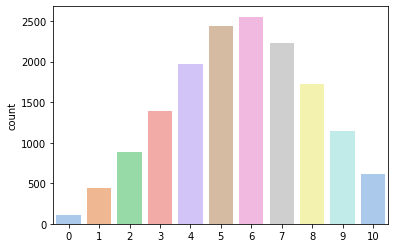

In [3]:
#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'
FSYESCNT = []
for element in df["FOYESCNT"]:
    if element != -1:
      FSYESCNT.append(element)

        
res = sns.countplot(x=FSYESCNT, palette="pastel")

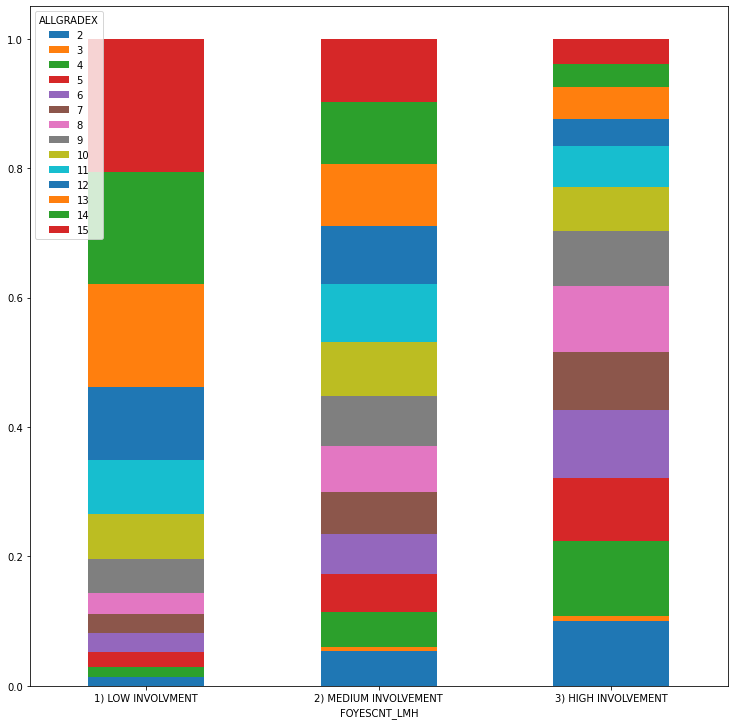

In [14]:
#ALLGRADEX
#What is this child’s current grade, grade equivalent, or year of school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.ALLGRADEX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


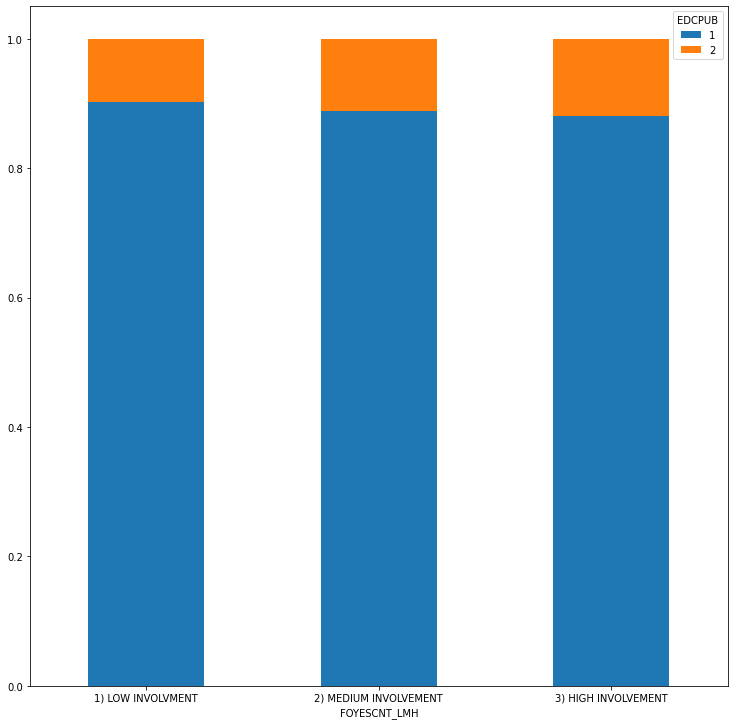

In [15]:
#EDCPUB
#Does this child attend a public school?
#ALLGRADEX
#What is this child’s current grade, grade equivalent, or year of school?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.EDCPUB, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

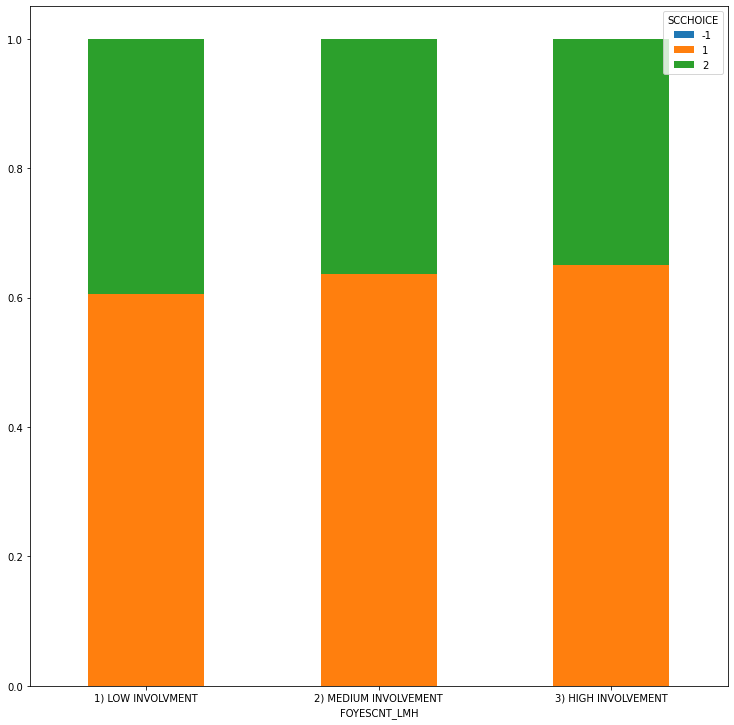

In [16]:
#SCCHOICE
#Did you feel that you had a choice in which school this child attends?
crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SCCHOICE, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

In [ ]:
#SPUBCHOIX
#Does your public school district let you choose 

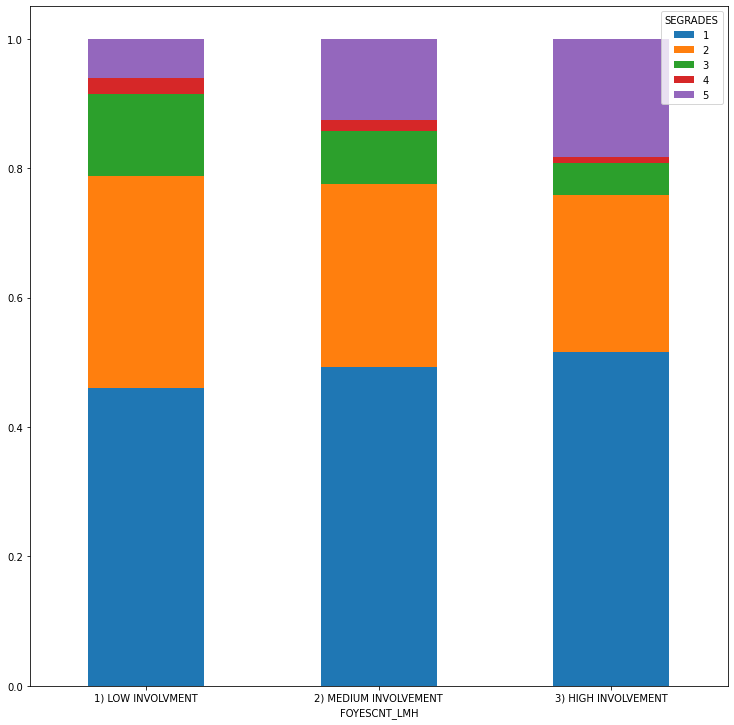

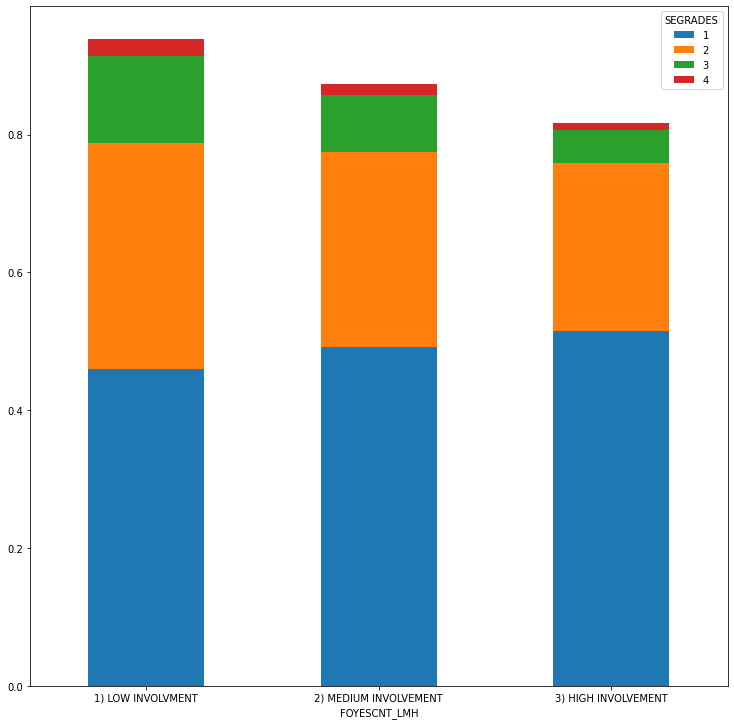

In [5]:
#SEGRADES
#Question: Please tell us about this child’s grades during this school year. Overall, across all subjects, what grades does this child get?
#Legend:  1 <- Mostly A's
#Legend:  2 <- Mostly B's
#Legend:  3 <- Mostly C's
#Legend:  4 <- Mostly D's or lower
#Legend:  5 <- School does not give grades

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FOYESCNT, df.SEGRADES, normalize="index")
#print(crosstb.loc[:,1:5])
#barplot = crosstb.loc[:,0:5].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
#barplot = crosstb.loc[:,0:4].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEGRADES, normalize = "index")
barplot = crosstb_LMH.loc[:,0:5].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
barplot = crosstb_LMH.loc[:,0:4].plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


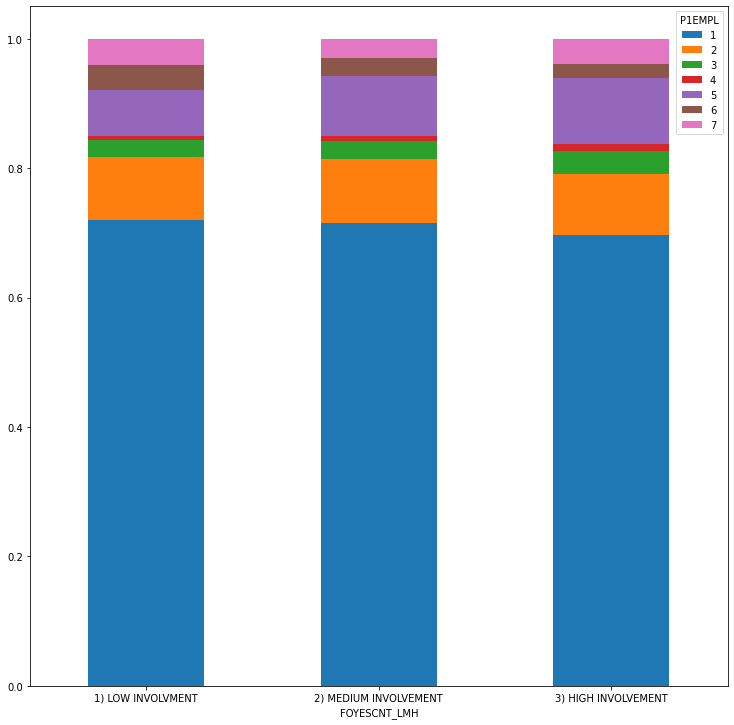

In [7]:
#P1EMPL
#Question: Which of the following best describes this parent or guardian’s employment status?
#Legend:  1 <- Employed for pay or income
#Legend:  2 <- Self-employed
#Legend:  3 <- Unemployed or out of work
#Legend:  4 <- Full-time student
#Legend:  5 <- Stay at home parent
#Legend:  6 <- Retired
#Legend:  7 <- Disabled or unable to work

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.P1EMPL, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.P1EMPL, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


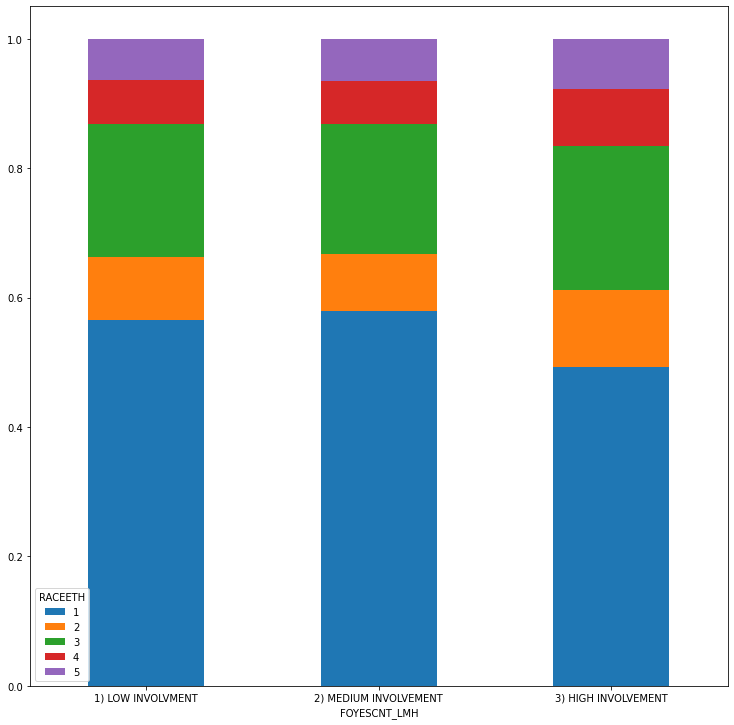

In [8]:
#Question: Race and ethnicity of child
#Legend:  1 <- White, non-Hispanic
#Legend:  2 <- Black, non-Hispanic
#Legend:  3 <- Hispanic
#Legend:  4 <- Asian or Pacific Islander, non-Hispanic
#Legend:  5 <- All other races and multiple races, non-Hispanic

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.RACEETH, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.RACEETH, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


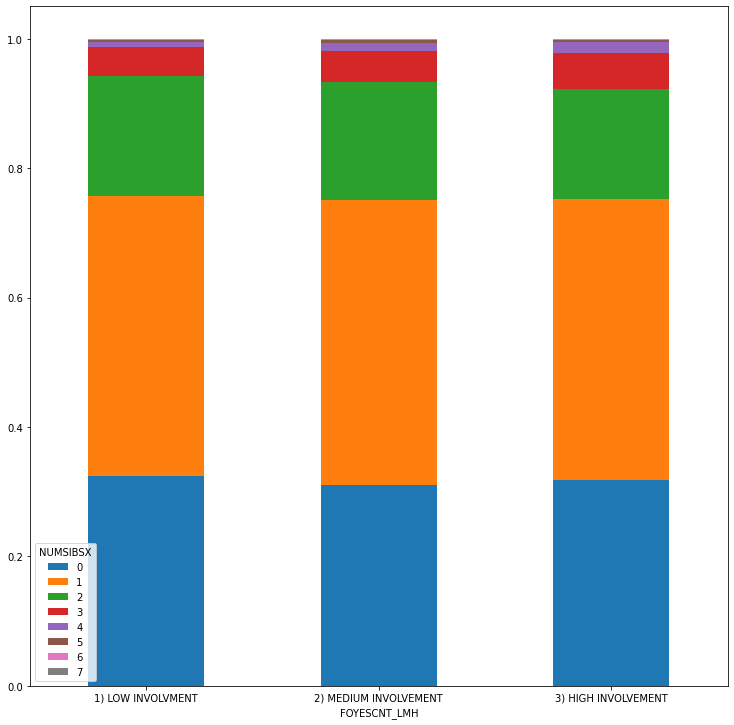

In [9]:
#Question: Number of child’s siblings
#Legend:  Number of siblings

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.NUMSIBSX,normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked=True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.NUMSIBSX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


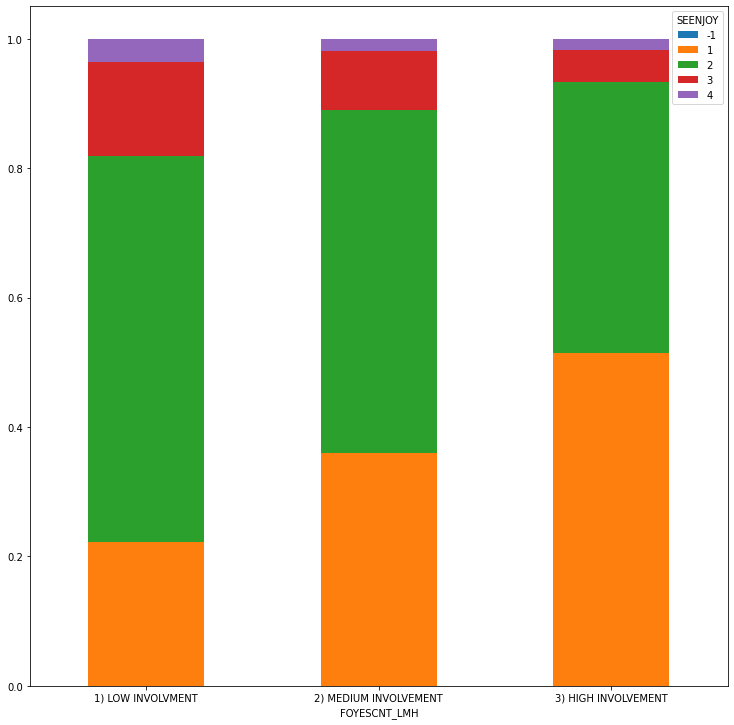

In [10]:
#SEENJOY
#Question: How much do you agree or disagree with the following statement: “This child enjoys school.”
#Legend:  1  <- Strongly agree
#Legend:  2  <- Agree
#Legend:  3  <- Disagree
#Legend:  4  <- Strongly disagree

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEENJOY, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEENJOY, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


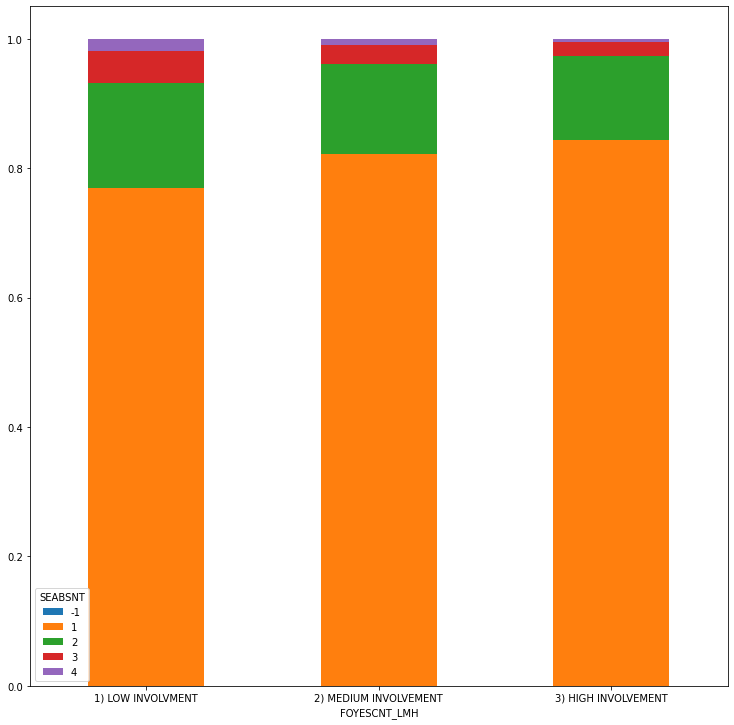

In [11]:
#SEABSNT
#Question: Since the beginning of this school year, how many days has this child been absent from school?
#Legend:  1 <- 0 to 5 days
#Legend:  2 <- 6 to 10 days
#Legend:  3 <- 11 to 20 days
#Legend:  4 <- More than 2 days (I'm assuming 2 is a typo)

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEABSNT, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEABSNT, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


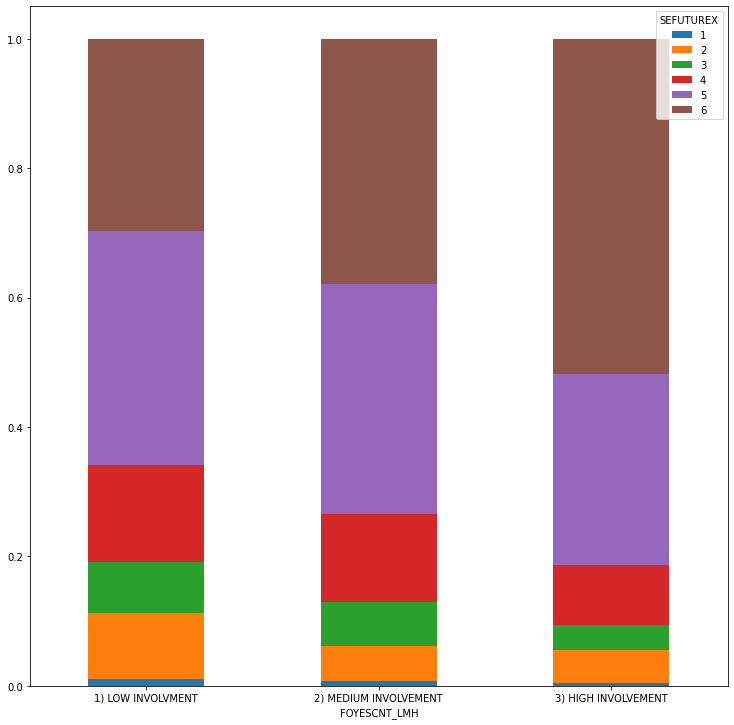

In [12]:
#SEFUTUREX
#Question: How far do you expect this child to go in his or her education?
#Legend:  1  <- Complete less than a high school diploma
#Legend:  2  <- Graduate from high school
#Legend:  3  <- Attend a vocational or technical school after high school
#Legend:  4  <- Attend two or more years of college
#Legend:  5  <- Earn a Bachelor’s degree
#Legend:  6  <- Earn a graduate degree or professional degree beyond a bachelor’s

#Question: How many times did you say 'Yes' to FO questions (ITEMS 72-74)
#Legend:  Number of 'Yes'

#crosstb = pd.crosstab(df.FOYESCNT, df.SEFUTUREX, normalize="index")
#barplot = crosstb.plot.bar(rot=0, figsize=(12.5,12.5), stacked = True)

crosstb_LMH = pd.crosstab(df.FOYESCNT_LMH, df.SEFUTUREX, normalize = "index")
barplot = crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
